On charge les librairies dont on a besoin

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy.io.arff import loadarff 
import visualization
import category_encoders as ce


chargement du dataset et affichage des colonnes

In [104]:
raw_data = loadarff('../datasets/Scenario A1-ARFF/TimeBasedFeatures-Dataset-15s-VPN.arff')
df = pd.DataFrame(raw_data[0])
df.columns


Index(['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat',
       'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat',
       'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active',
       'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1'],
      dtype='object')

On affiche les premières lignes du dataset

In [105]:
df.head() # afficher les premières lignes du dataset

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'Non-VPN'
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'Non-VPN'
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'Non-VPN'
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'Non-VPN'
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'Non-VPN'


On s'intéresse au type de données du dataset, ici on a que des float, sauf class1.

In [106]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18758 entries, 0 to 18757
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration            18758 non-null  float64
 1   total_fiat          18758 non-null  float64
 2   total_biat          18758 non-null  float64
 3   min_fiat            18758 non-null  float64
 4   min_biat            18758 non-null  float64
 5   max_fiat            18758 non-null  float64
 6   max_biat            18758 non-null  float64
 7   mean_fiat           18758 non-null  float64
 8   mean_biat           18758 non-null  float64
 9   flowPktsPerSecond   18758 non-null  float64
 10  flowBytesPerSecond  18758 non-null  float64
 11  min_flowiat         18758 non-null  float64
 12  max_flowiat         18758 non-null  float64
 13  mean_flowiat        18758 non-null  float64
 14  std_flowiat         18758 non-null  float64
 15  min_active          18758 non-null  float64
 16  mean

In [107]:
encoder = ce.OneHotEncoder(cols=['class1'], use_cat_names=True)
df = encoder.fit_transform(df)
df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1_b'Non-VPN',class1_b'VPN'
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,1,0
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,1,0
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,1,0
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,1,0
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,1,0


Ici on a fait un one hot encoding pour mapper numériquement la colonne class1 vers un entier

In [108]:
df.describe()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1_b'Non-VPN',class1_b'VPN'
count,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,18758.000000,...,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,18758.000000,18758.000000
mean,9.791705e+06,6.086783e+05,6.267802e+05,3.314204e+06,2.861716e+06,1.003929e+06,9.218250e+05,8.448286e+05,6.133578e+05,2073.780095,...,3.253846e+06,3.635654e+06,4.091204e+06,5.025001e+05,2.983753e+06,3.325142e+06,3.732466e+06,4.531389e+05,0.477929,0.522071
std,1.438458e+07,2.243195e+06,2.326442e+06,1.062115e+07,9.652561e+06,3.141855e+06,2.495984e+06,4.336559e+06,2.516395e+06,19115.713624,...,1.342955e+07,1.356162e+07,1.400211e+07,2.813959e+06,1.334323e+07,1.347430e+07,1.390155e+07,2.785573e+06,0.499526,0.499526
min,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000,0.000000
25%,3.346690e+05,7.000000e+00,2.000000e+00,2.597050e+04,2.454225e+04,1.154333e+04,5.626786e+03,1.145469e+02,0.000000e+00,2.599190,...,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000,0.000000
50%,1.109263e+07,6.200000e+01,2.100000e+01,2.821430e+05,2.865800e+05,5.104959e+04,3.526250e+04,1.164916e+04,9.605910e+03,11.681220,...,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000,1.000000
75%,1.494537e+07,1.645000e+03,1.651000e+03,4.289454e+06,4.265465e+06,5.260302e+05,4.843726e+05,6.055940e+05,5.340370e+05,100.671695,...,2.767727e+06,4.248512e+06,5.690602e+06,0.000000e+00,1.943930e+06,3.333185e+06,4.696002e+06,0.000000e+00,1.000000,1.000000
max,6.014050e+08,3.768079e+07,4.300238e+07,3.035957e+08,6.001097e+08,1.520000e+08,4.300000e+07,2.150000e+08,9.800000e+07,1000000.000000,...,6.014050e+08,6.010000e+08,6.014050e+08,1.680000e+08,6.001097e+08,6.000000e+08,6.001097e+08,1.680000e+08,1.000000,1.000000


In [96]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18758 entries, 0 to 18757
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration            18758 non-null  float64
 1   total_fiat          18758 non-null  float64
 2   total_biat          18758 non-null  float64
 3   min_fiat            18758 non-null  float64
 4   min_biat            18758 non-null  float64
 5   max_fiat            18758 non-null  float64
 6   max_biat            18758 non-null  float64
 7   mean_fiat           18758 non-null  float64
 8   mean_biat           18758 non-null  float64
 9   flowPktsPerSecond   18758 non-null  float64
 10  flowBytesPerSecond  18758 non-null  float64
 11  min_flowiat         18758 non-null  float64
 12  max_flowiat         18758 non-null  float64
 13  mean_flowiat        18758 non-null  float64
 14  std_flowiat         18758 non-null  float64
 15  min_active          18758 non-null  float64
 16  mean

In [109]:
df.duplicated().sum() # afficher le nombre de doublons
# on a 720 doublons

720

In [110]:
df.drop_duplicates(inplace=True) # supprimer les doublons
df.duplicated().sum() # vérifier qu'il n'y a plus de doublons
# on a 0 doublons

0

In [99]:
df.describe()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1_b'Non-VPN',class1_b'VPN'
count,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,18038.000000,...,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,18038.000000,18038.000000
mean,1.018252e+07,6.329739e+05,6.517986e+05,3.446492e+06,2.975943e+06,1.044001e+06,9.586203e+05,8.785506e+05,6.378404e+05,1470.923976,...,3.383726e+06,3.780774e+06,4.254508e+06,5.225578e+05,3.102852e+06,3.457867e+06,3.881450e+06,4.712263e+05,0.481594,0.518406
std,1.453260e+07,2.284165e+06,2.368982e+06,1.080999e+07,9.826048e+06,3.197414e+06,2.538375e+06,4.418914e+06,2.563083e+06,15017.504961,...,1.367891e+07,1.380980e+07,1.425449e+07,2.867746e+06,1.359335e+07,1.372389e+07,1.415588e+07,2.839125e+06,0.499675,0.499675
min,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000,0.000000
25%,6.753998e+05,1.000000e+01,2.000000e+00,2.811625e+04,2.532750e+04,1.762400e+04,1.073220e+04,5.922979e+02,5.802418e+02,3.159430,...,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000,0.000000
50%,1.179582e+07,6.900000e+01,2.400000e+01,3.371100e+05,3.695825e+05,7.000422e+04,4.760745e+04,1.357546e+04,1.483127e+04,12.223917,...,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000,1.000000
75%,1.496136e+07,2.897250e+03,2.731750e+03,4.544316e+06,4.530587e+06,5.688034e+05,5.272800e+05,6.723879e+05,6.077620e+05,100.666005,...,2.937108e+06,4.407711e+06,5.948750e+06,0.000000e+00,2.066673e+06,3.508585e+06,4.900800e+06,0.000000e+00,1.000000,1.000000
max,6.014050e+08,3.768079e+07,4.300238e+07,3.035957e+08,6.001097e+08,1.520000e+08,4.300000e+07,2.150000e+08,9.800000e+07,1000000.000000,...,6.014050e+08,6.010000e+08,6.014050e+08,1.680000e+08,6.001097e+08,6.000000e+08,6.001097e+08,1.680000e+08,1.000000,1.000000


On a des valeurs négatives qui n'ont pas de sens ici, on les supprime

In [111]:
df[df >=0].dropna()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1_b'Non-VPN',class1_b'VPN'
0,9368711.0,16.0,4.0,1564818.0,1549373.0,1.902053e+05,2.032905e+05,3.898224e+05,3.703237e+05,10.353612,...,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,1.610965e+05,1,0
1,7340238.0,18.0,4.0,1567554.0,1527893.0,1.656870e+05,1.869148e+05,3.172675e+05,3.043707e+05,11.580006,...,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,2.731384e+05,1,0
2,4644225.0,29.0,15.0,1270547.0,1079974.0,1.658652e+05,1.953021e+05,3.294731e+05,3.004926e+05,11.412022,...,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000e+00,1,0
3,4978735.0,19.0,8.0,2492050.0,2457286.0,2.395432e+05,2.765964e+05,6.124353e+05,6.283396e+05,8.034169,...,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,7.749303e+05,1,0
4,11838189.0,19.0,10.0,3094089.0,3093543.0,2.437665e+05,2.959547e+05,5.997218e+05,6.256327e+05,7.602514,...,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,7.259878e+05,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17968,10006782.0,3999253.0,3999290.0,6007321.0,6007291.0,5.003287e+06,5.003290e+06,1.419918e+06,1.419871e+06,0.599593,...,3999290.0,5.003290e+06,6007291.0,1.419871e+06,3999052.0,5003067.5,6007083.0,1.419892e+06,1,0
17969,14012396.0,6008673.0,6008650.0,8003530.0,8003564.0,7.006102e+06,7.006107e+06,1.410577e+06,1.410617e+06,0.428192,...,6008650.0,7.006107e+06,8003564.0,1.410617e+06,6008491.0,7005931.0,8003371.0,1.410593e+06,1,0
18196,8712389.0,1990162.0,1988563.0,6608031.0,6609078.0,4.299096e+06,4.298820e+06,3.265326e+06,3.267197e+06,0.688674,...,1990162.0,4.299096e+06,6608031.0,3.265326e+06,1875414.0,4185148.0,6494882.0,3.266457e+06,1,0
18261,14253939.0,7002496.0,6995059.0,7006795.0,7042458.0,7.004646e+06,7.018758e+06,3.039852e+03,3.351615e+04,0.420936,...,7002496.0,7.004646e+06,7006795.0,3.039852e+03,6790373.0,6794091.5,6797810.0,5.258753e+03,1,0


In [112]:
df.describe()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1_b'Non-VPN',class1_b'VPN'
count,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,18038.000000,...,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,1.803800e+04,18038.000000,18038.000000
mean,1.018252e+07,6.329739e+05,6.517986e+05,3.446492e+06,2.975943e+06,1.044001e+06,9.586203e+05,8.785506e+05,6.378404e+05,1470.923976,...,3.383726e+06,3.780774e+06,4.254508e+06,5.225578e+05,3.102852e+06,3.457867e+06,3.881450e+06,4.712263e+05,0.481594,0.518406
std,1.453260e+07,2.284165e+06,2.368982e+06,1.080999e+07,9.826048e+06,3.197414e+06,2.538375e+06,4.418914e+06,2.563083e+06,15017.504961,...,1.367891e+07,1.380980e+07,1.425449e+07,2.867746e+06,1.359335e+07,1.372389e+07,1.415588e+07,2.839125e+06,0.499675,0.499675
min,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000,0.000000
25%,6.753998e+05,1.000000e+01,2.000000e+00,2.811625e+04,2.532750e+04,1.762400e+04,1.073220e+04,5.922979e+02,5.802418e+02,3.159430,...,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000,0.000000
50%,1.179582e+07,6.900000e+01,2.400000e+01,3.371100e+05,3.695825e+05,7.000422e+04,4.760745e+04,1.357546e+04,1.483127e+04,12.223917,...,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000,1.000000
75%,1.496136e+07,2.897250e+03,2.731750e+03,4.544316e+06,4.530587e+06,5.688034e+05,5.272800e+05,6.723879e+05,6.077620e+05,100.666005,...,2.937108e+06,4.407711e+06,5.948750e+06,0.000000e+00,2.066673e+06,3.508585e+06,4.900800e+06,0.000000e+00,1.000000,1.000000
max,6.014050e+08,3.768079e+07,4.300238e+07,3.035957e+08,6.001097e+08,1.520000e+08,4.300000e+07,2.150000e+08,9.800000e+07,1000000.000000,...,6.014050e+08,6.010000e+08,6.014050e+08,1.680000e+08,6.001097e+08,6.000000e+08,6.001097e+08,1.680000e+08,1.000000,1.000000


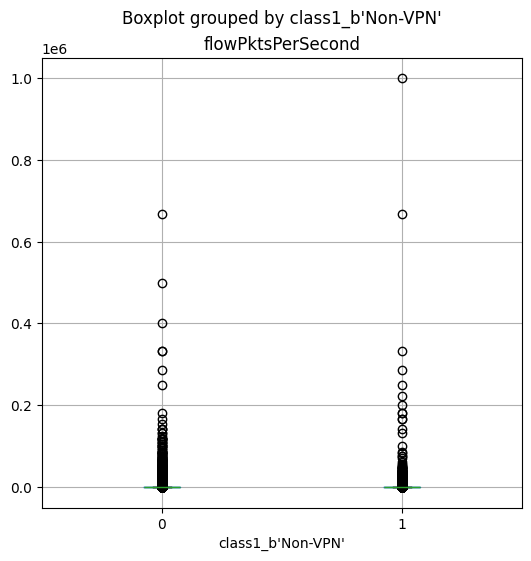

In [113]:
df.boxplot(column=['flowPktsPerSecond',], by="class1_b'Non-VPN'", figsize=(6, 6))
plt.show()

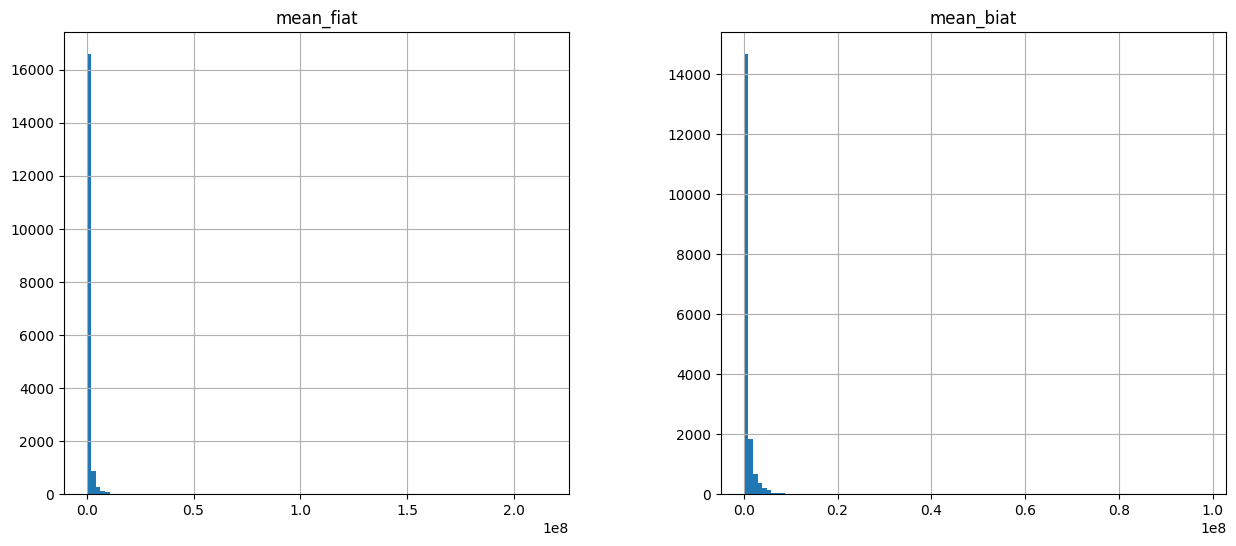

In [114]:
df[['mean_fiat','mean_biat']].hist(bins=100, figsize=(15,6))
plt.show()

<Figure size 2000x1500 with 0 Axes>

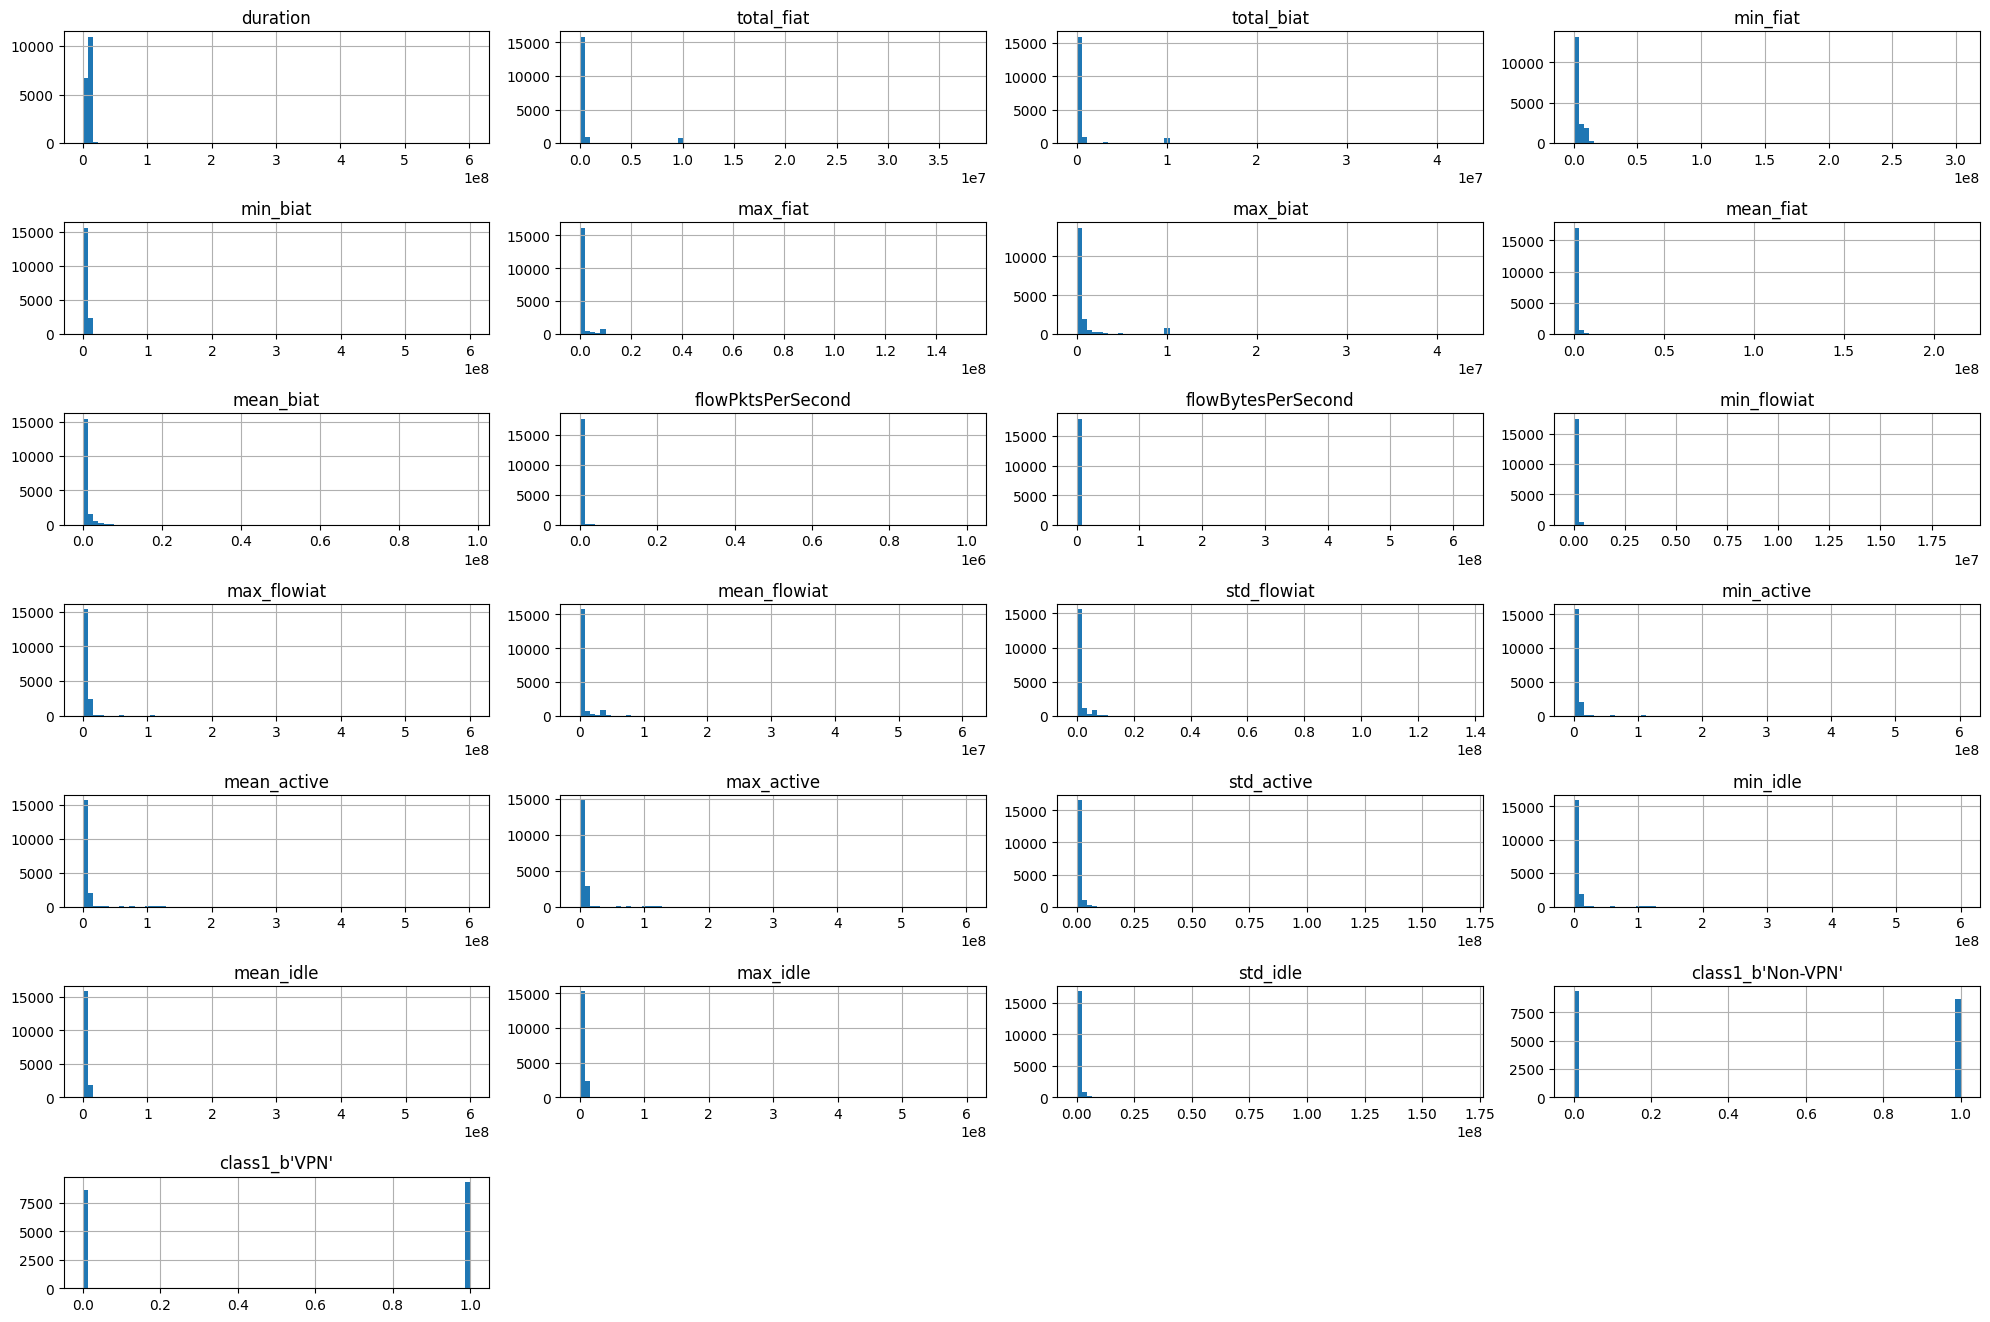

In [126]:
plt.figure(figsize=(20, 15))  # Ajuster la taille de la figure pour afficher plusieurs histogrammes
df.hist(bins=75, figsize=(20, 15), layout=(8, 4)) 
plt.tight_layout()
plt.show()

In [123]:
print(df.columns)

Index(['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat',
       'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat',
       'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active',
       'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1_b'Non-VPN'',
       'class1_b'VPN''],
      dtype='object')


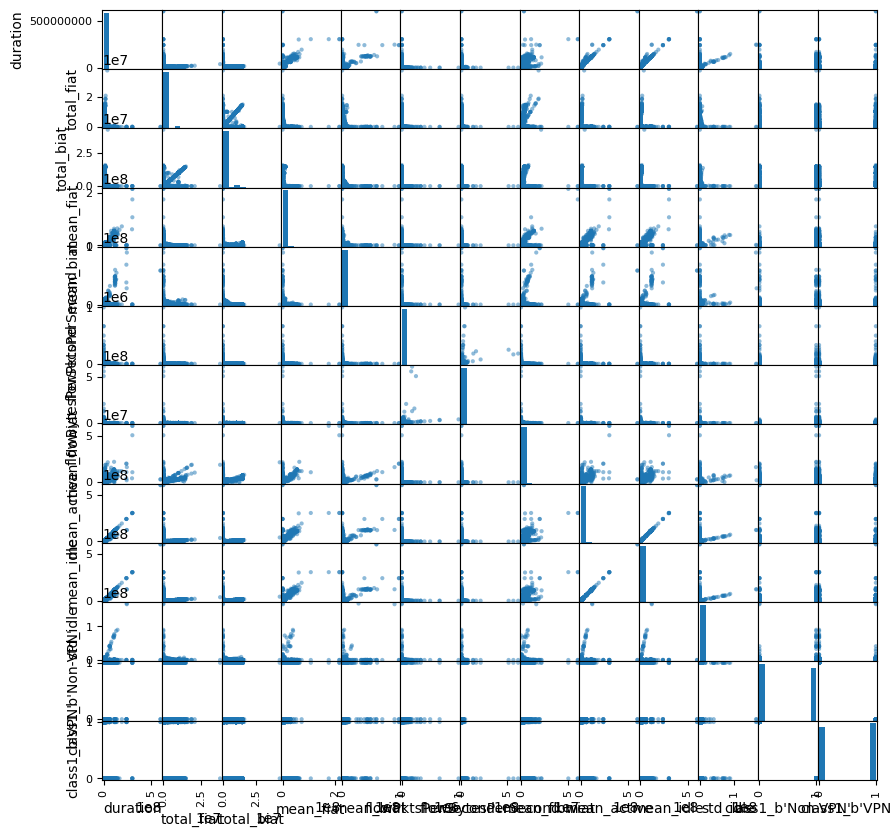

In [128]:
columns_to_plot = ['duration', 'total_fiat', 'total_biat',
                    'mean_fiat', 'mean_biat', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'mean_flowiat',
        'mean_active', 'mean_idle', 'std_idle', "class1_b'Non-VPN'",
       "class1_b'VPN'"]
sm = scatter_matrix(df[columns_to_plot],
                   figsize=(10,10))

plt.show()

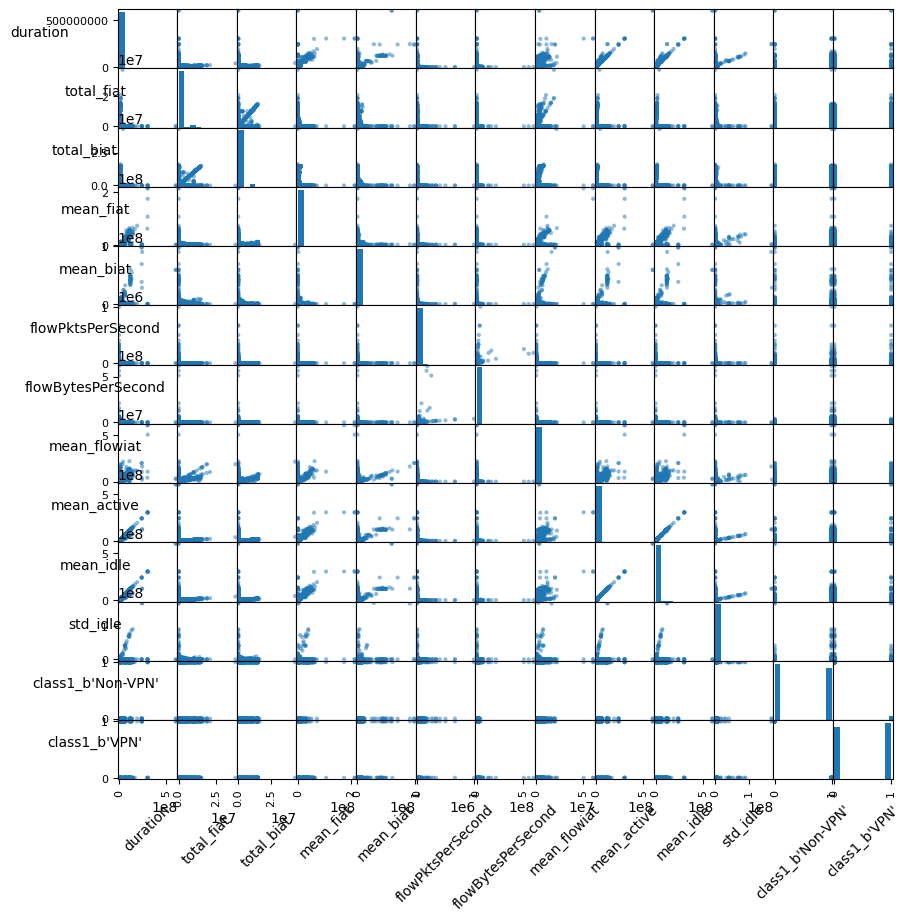

In [129]:
sm = scatter_matrix(df[columns_to_plot],
                   figsize=(10,10))
visualization.rotate_labels(sm)
plt.show()

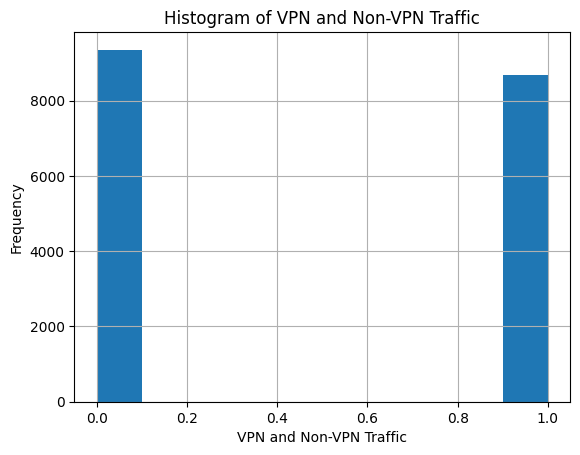

In [133]:
df[["class1_b'Non-VPN'"]].hist()
plt.title('Histogram of VPN and Non-VPN Traffic')
plt.xlabel('VPN and Non-VPN Traffic') 
plt.ylabel('Frequency')
plt.show()

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

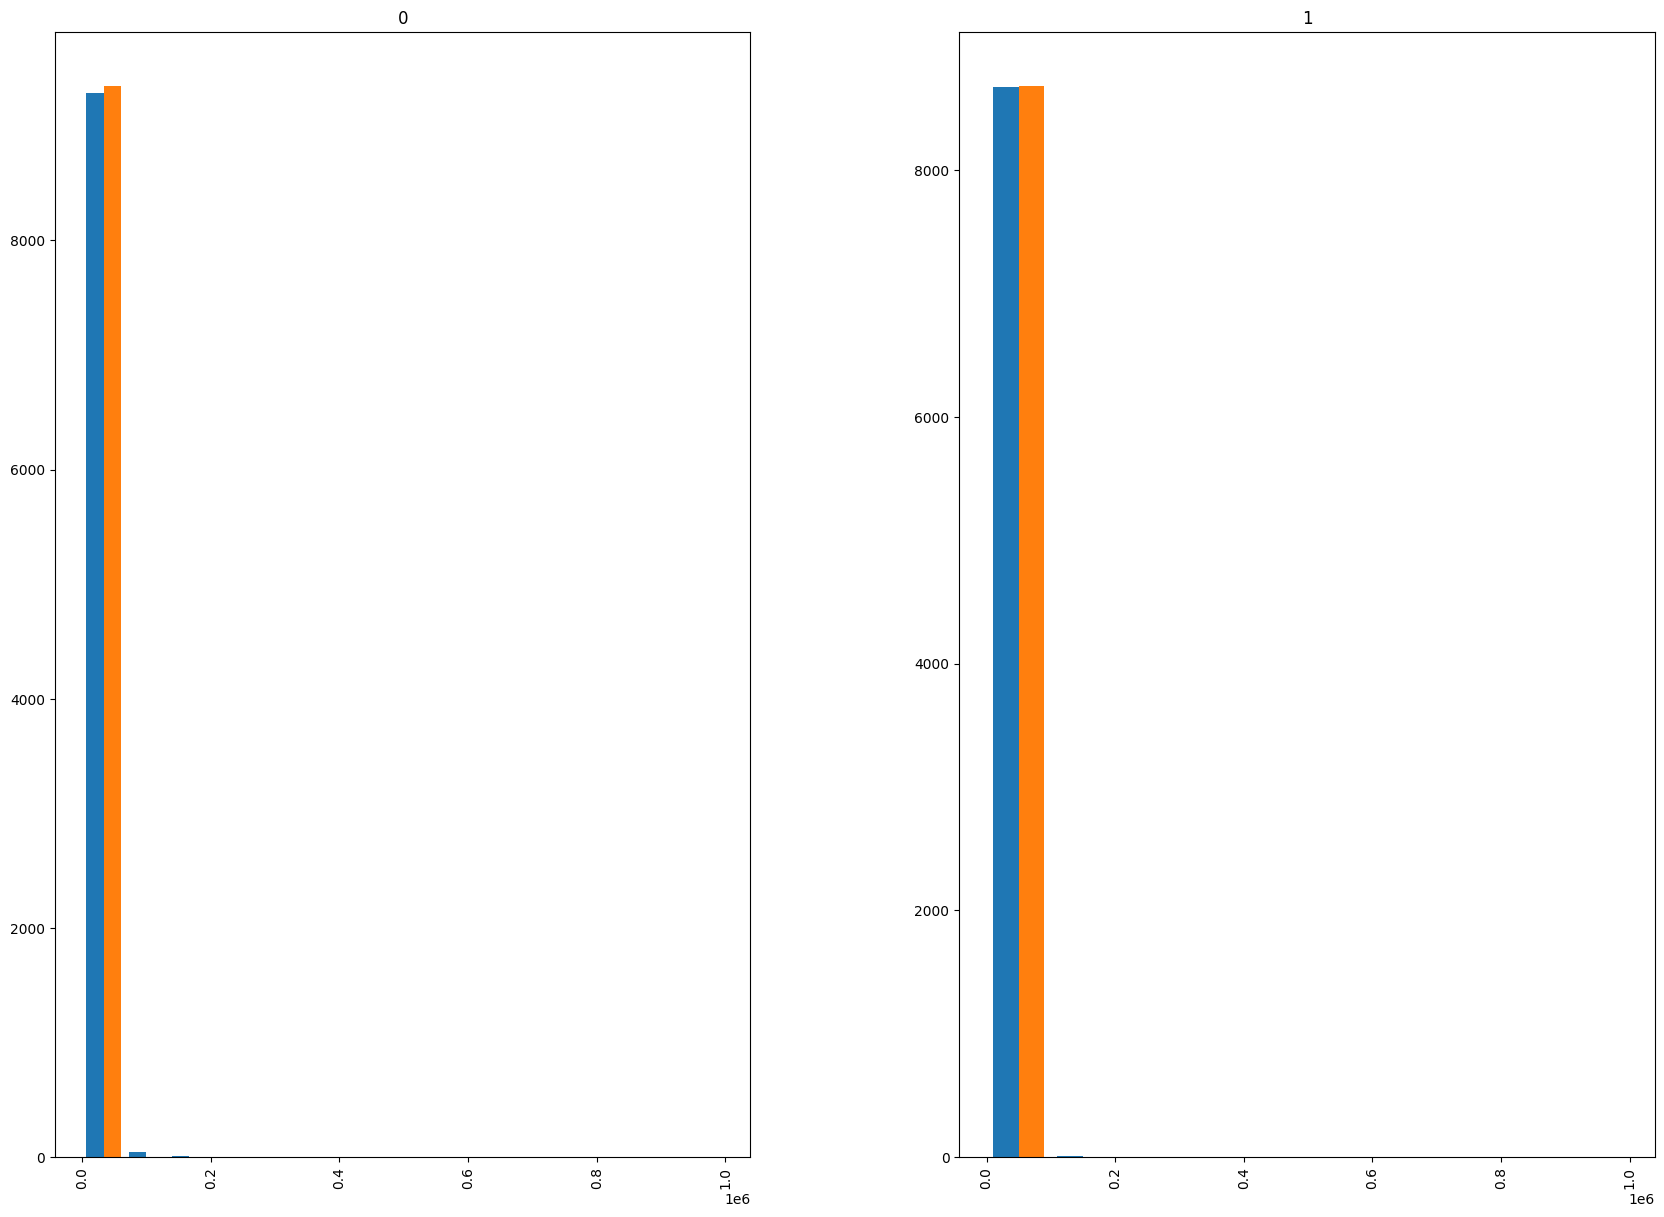

In [142]:
# sharex imposes all the plots to have the same x range
# (otherwise visual comparison is different).
df[['flowPktsPerSecond', "class1_b'Non-VPN'"]].hist(figsize=(20,15), by="class1_b'Non-VPN'",
                                    sharex=True, bins=10)